# Introduction

Les systèmes de vélo en libre-service sont une nouvelle génération de location traditionnelle de vélos où tout le processus, de l'adhésion à la location et au retour, est devenu automatique. 
est devenu automatique. Grâce à ces systèmes, l'utilisateur peut facilement louer un vélo à un endroit précis et le rendre à un autre endroit. 
et le restituer à un autre endroit. Actuellement, il existe environ plus de 500 programmes de vélos en libre-service dans le monde, qui se composent de 
plus de 500 000 bicyclettes. Aujourd'hui, il existe un grand intérêt pour ces systèmes en raison de leur rôle important dans le trafic, 
les questions d'environnement et de santé. 

Outre les applications intéressantes des systèmes de partage de vélos dans le monde réel, les caractéristiques des données générées par ces systèmes les rendent attrayantes pour la recherche.
ces systèmes les rendent attractifs pour la recherche. Contrairement à d'autres services de transport tels que le bus ou le métro, la durée du trajet, la position de départ et d'arrivée sont des données importantes.
de voyage, la position de départ et d'arrivée sont explicitement enregistrées dans ces systèmes. Cette caractéristique transforme le système de vélo en libre-service en
un réseau de capteurs virtuel qui peut être utilisé pour détecter la mobilité dans la ville. On peut donc s'attendre à ce que la plupart des événements importants
événements importants de la ville puissent être détectés par le biais de ces données.

## Dataset

Le processus de location de vélos en libre-service est fortement corrélé aux paramètres environnementaux et saisonniers. Par exemple, les conditions météorologiques, les précipitations, le jour de la semaine, la saison, l'heure de la journée, etc. peuvent affecter les comportements de location. L'ensemble de données de base est lié à l'historique de deux ans correspondant aux années 2011 et 2012 du système Capital Bikeshare, Washington D.C., USA. Nous avons agrégé les données sur une base bihoraire et quotidienne, puis extrait et ajouté les informations météorologiques et saisonnières correspondantes.

## Packages

In [88]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats as st

import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures #?

from sklearn import metrics

from pandas import DataFrame,Series

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn import linear_model

from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict

from sklearn import svm

from sklearn.svm import SVR

from sklearn.svm import SVR

import sklearn.model_selection as model_selection

from sklearn.preprocessing import MinMaxScaler

import warnings

pd.options.mode.chained_assignment = None

warnings.filterwarnings("ignore", category=DeprecationWarning)

## Exlploitation

In [2]:
df = pd.read_csv("hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
# duplicates and non missing values verification
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#Remplacer les catégories des variables "season" and "weather" par des catégories plus explicite.
dic_season = {1 : "printemps" ,
              2 : "été" ,
              3 : "automne" ,
              4 :"hiver" }
dic_weathersit = {1 : "Clair, Peu de nuages, Partiellement nuageux, Partiellement nuageux",
                  2 : "Brume + nuageux, Brume + nuages fragmentés, Brume + peu de nuages, Brume",
                  3 : "Neige légère, Pluie légère + Orage + Nuages épars, Pluie légère + Nuages épars",
                  4 : "Forte pluie + palettes de glace + orage + brume, neige + brouillard"}
dic_yr = {0 : 2011, 1: 2012}
dic_holiday = {1: "férié", 0: "non férié"}
dic_workingday ={1: "jour ouvré", 0 : "férié ou week-end" }

In [9]:
df["season"] = df.season.map(dic_season)
df["weathersit"] = df.weathersit.map(dic_weathersit)
df["yr"] = df.yr.map(dic_yr)
df["holiday"] = df.holiday.map(dic_holiday)
df["workingday"] = df.workingday.map(dic_workingday)

In [10]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,printemps,2011,1,0,non férié,6,férié ou week-end,"Clair, Peu de nuages, Partiellement nuageux, P...",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,printemps,2011,1,1,non férié,6,férié ou week-end,"Clair, Peu de nuages, Partiellement nuageux, P...",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,printemps,2011,1,2,non férié,6,férié ou week-end,"Clair, Peu de nuages, Partiellement nuageux, P...",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,printemps,2011,1,3,non férié,6,férié ou week-end,"Clair, Peu de nuages, Partiellement nuageux, P...",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,printemps,2011,1,4,non férié,6,férié ou week-end,"Clair, Peu de nuages, Partiellement nuageux, P...",0.24,0.2879,0.75,0.0,0,1,1


In [11]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,printemps,2012,12,19,non férié,1,jour ouvré,"Brume + nuageux, Brume + nuages fragmentés, Br...",0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,printemps,2012,12,20,non férié,1,jour ouvré,"Brume + nuageux, Brume + nuages fragmentés, Br...",0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,printemps,2012,12,21,non férié,1,jour ouvré,"Clair, Peu de nuages, Partiellement nuageux, P...",0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,printemps,2012,12,22,non férié,1,jour ouvré,"Clair, Peu de nuages, Partiellement nuageux, P...",0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,printemps,2012,12,23,non férié,1,jour ouvré,"Clair, Peu de nuages, Partiellement nuageux, P...",0.26,0.2727,0.65,0.1343,12,37,49


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  object 
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  object 
 9   weathersit  17379 non-null  object 
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(8), object(5)
memory usage: 2.3+ MB


## Analysis

In [13]:
df.describe()

,instant,yr,mnth,hr,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2011.502561,6.537775,11.546752,3.003683,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.500008,3.438776,6.914405,2.005771,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,2011.000000,1.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011.000000,4.000000,6.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012.000000,7.000000,12.000000,3.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012.000000,10.000000,18.000000,5.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012.000000,12.000000,23.000000,6.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


[Text(0, 0.5, 'Cnt'), Text(0.5, 1.0, 'Box Plot On Cnt')]

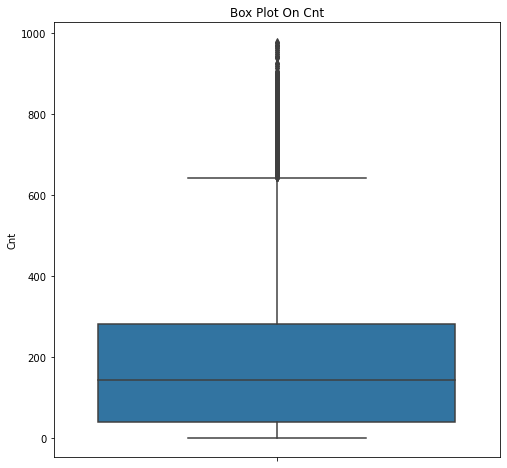

In [14]:
#Les valeurs aberrantes ou outliers, doivent être traitées ou du moins identifier. 
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sns.boxplot(data=df,y="cnt",orient="v",ax=axes)

axes.set(ylabel='Cnt',title="Box Plot On Cnt")

[Text(0.5, 0, 'Season'),
 Text(0, 0.5, 'Cnt'),
 Text(0.5, 1.0, 'Box Plot On Count Across Season')]

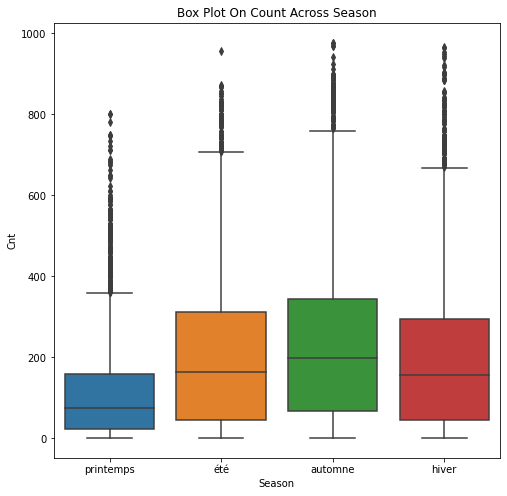

In [15]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sns.boxplot(data=df,y="cnt",x="season",orient="v",ax=axes)
axes.set(xlabel='Season', ylabel='Cnt',title="Box Plot On Count Across Season")

[Text(0.5, 0, 'weekday'),
 Text(0, 0.5, 'Cnt'),
 Text(0.5, 1.0, 'Box Plot On Count Across week days')]

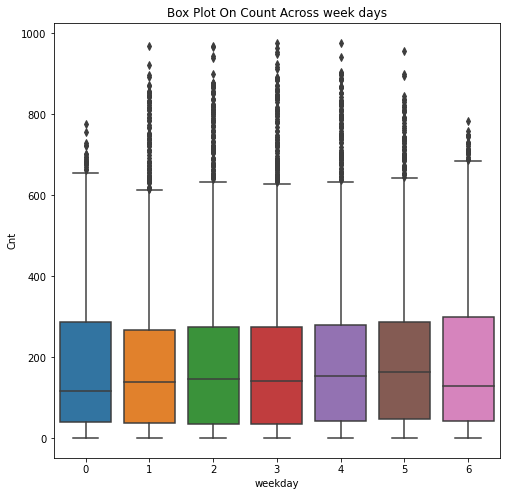

In [16]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sns.boxplot(data=df,y="cnt",x="weekday",orient="v",ax=axes)
axes.set(xlabel='weekday', ylabel='Cnt',title="Box Plot On Count Across week days")

[Text(0.5, 0, 'hr'),
 Text(0, 0.5, 'Cnt'),
 Text(0.5, 1.0, 'Box Plot On Count Across Hour of the day')]

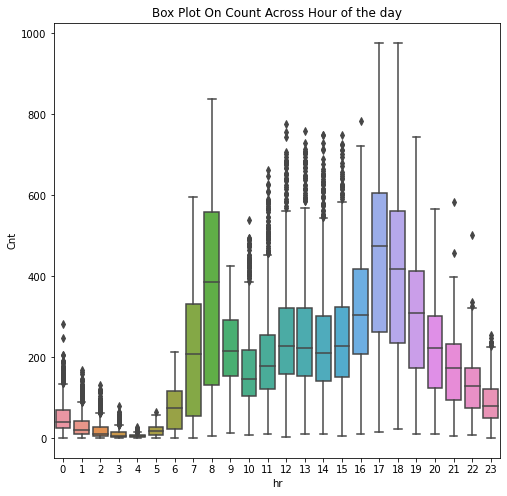

In [17]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sns.boxplot(data=df,y="cnt",x = "hr",orient="v",ax=axes)
axes.set(xlabel='hr', ylabel='Cnt',title="Box Plot On Count Across Hour of the day")

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'cnt'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

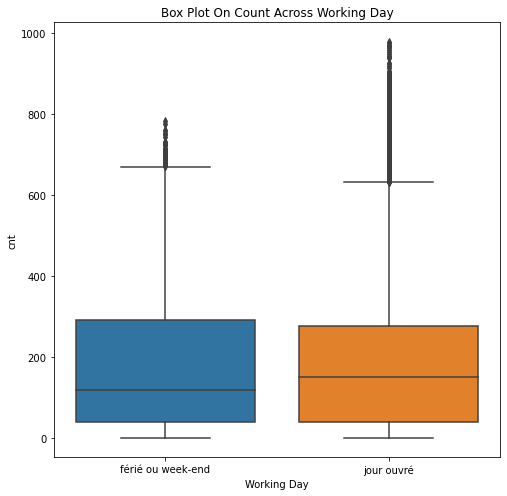

In [18]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sns.boxplot(data=df,y="cnt",x="workingday",orient="v",ax=axes)
axes.set(xlabel='Working Day', ylabel='cnt',title="Box Plot On Count Across Working Day")

In [19]:
df.shape[0] - df[np.abs(df["cnt"] - df["cnt"].mean()) <= (3 * df["cnt"].std())].shape[0]

244

In [20]:
# deleting ouliers
df_without_outliers = df[
    np.abs(df["cnt"] - df["cnt"].mean()) <= (3 * df["cnt"].std())
] 

In [21]:
print ("Shape Of The Before Ouliers: ",df.shape)
print ("Shape Of The After Ouliers: ",df_without_outliers.shape)

Shape Of The Before Ouliers:  (17379, 17)
Shape Of The After Ouliers:  (17135, 17)


<AxesSubplot:>

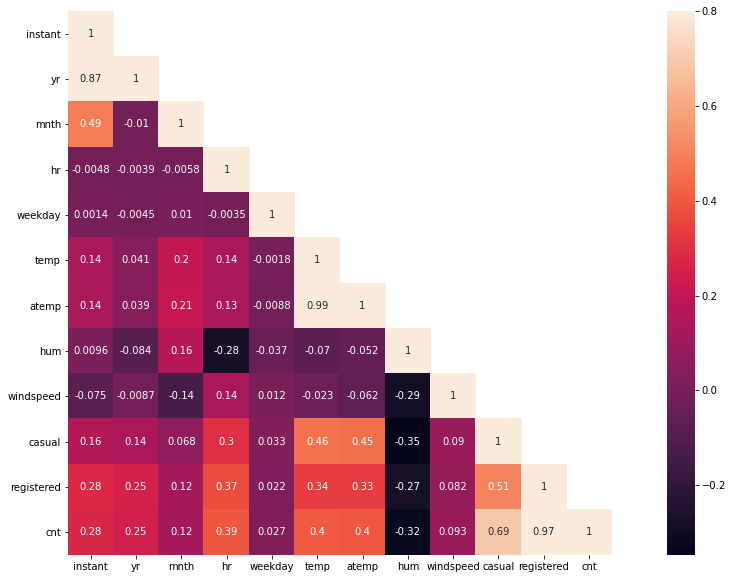

In [22]:
# Corrélation (vérification de la qualité de la donnée)
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask = mask, vmax= .8, square = True, annot = True)

<AxesSubplot:xlabel='registered', ylabel='cnt'>

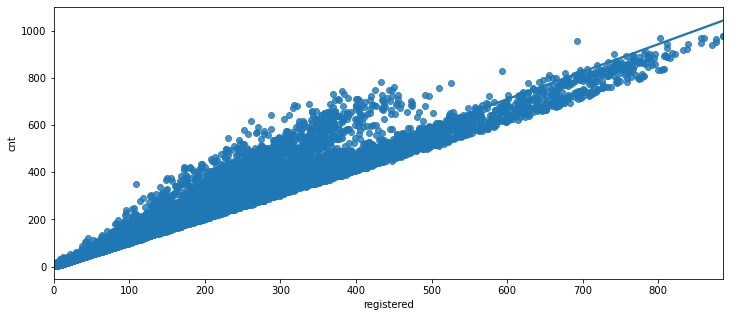

In [23]:
fig,ax = plt.subplots()
fig.set_size_inches(12, 5)
sns.regplot(x="registered", y="cnt", data=df,ax=ax)

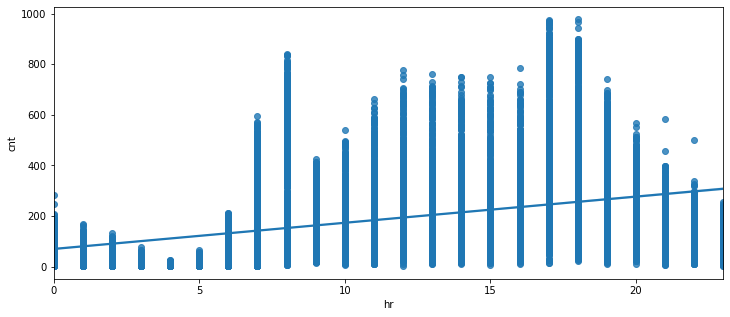

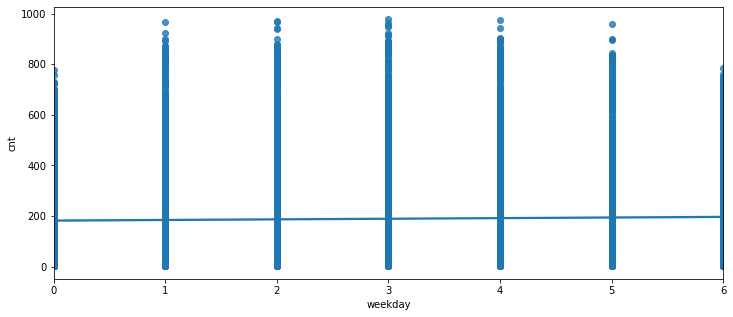

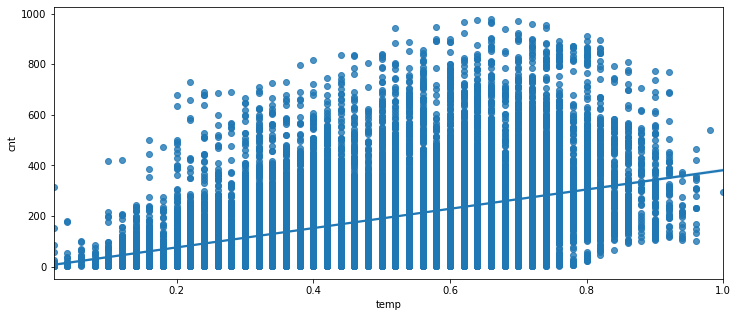

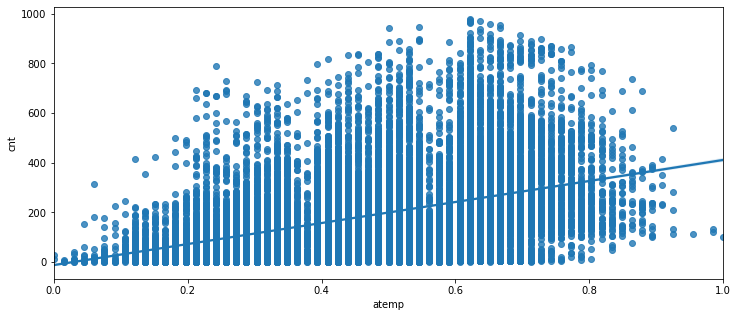

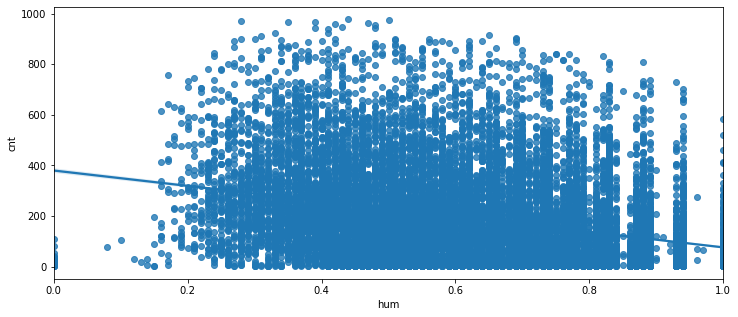

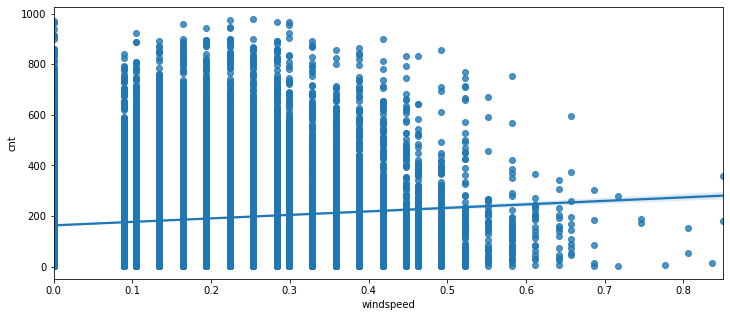

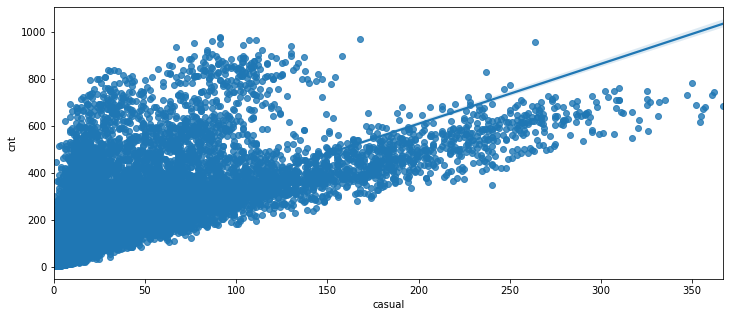

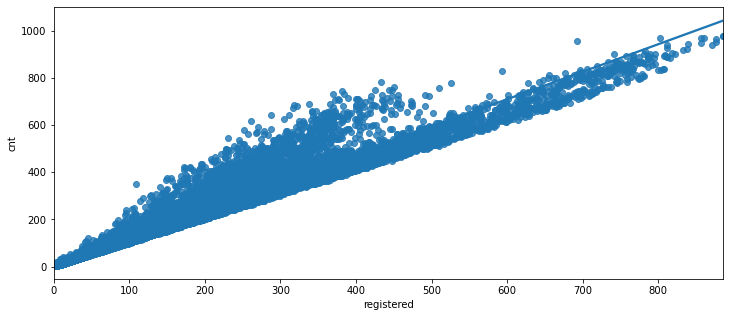

In [24]:
Features = [ 
 'hr',
 'weekday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered'
]
for x in Features:
    fig,ax = plt.subplots()
    fig.set_size_inches(12, 5)
    sns.regplot(x= x , y="cnt", data=df,ax=ax)

In [25]:
yearAggregated = pd.DataFrame(df.groupby("yr")["cnt"].mean()).reset_index()

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 1.0, 'Average Count By Year')]

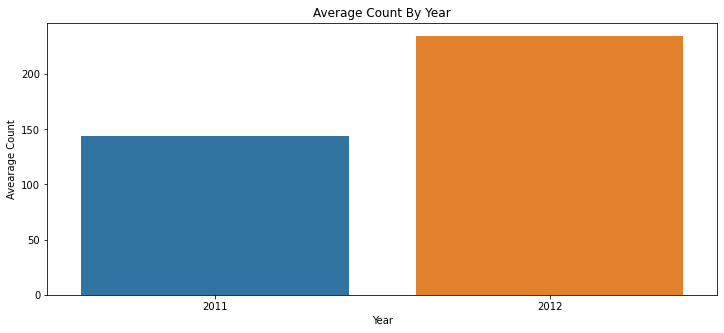

In [26]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
sns.barplot(data=yearAggregated,x="yr",y="cnt",ax=ax)#,order=sortOrder)
ax.set(xlabel='Year', ylabel='Avearage Count',title="Average Count By Year")

In [27]:
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(df.groupby("mnth")["cnt"].mean()).reset_index()

In [28]:
dic_month = {1 : "Janvier" ,
              2 : "Février" ,
              3 : "Mars" ,
              4 :"Avril" ,
              5: "Mai",
              6:"Juin",
              7:"Juillet",
              8:"Août",
              9:"Septembre",
              10:"Octobre",
              11:"Novembre",
              12:"Decembre",
             }
dic_day = {
    0 : "Lundi",
    1 : "Mardi",
    2 : "Mercredi",
    3 : "Jeudi",
    4 : "Vendredi",
    5 : "Samedi",
    6 : "Dimanche"
}
monthAggregated["mnth"] = monthAggregated.mnth.map(dic_month)

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 1.0, 'Average Count By Month')]

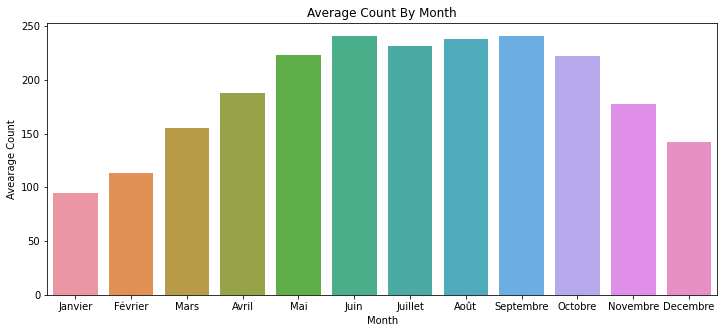

In [29]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
sns.barplot(data=monthAggregated,x="mnth",y="cnt",ax=ax)#,order=sortOrder)
ax.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

In [30]:
dayAggregated = pd.DataFrame(df.groupby(["weekday","mnth"],sort=True)["cnt"].mean()).reset_index()
dayAggregated["mnth"] = dayAggregated.mnth.map(dic_month)
dayAggregated["weekday"] = dayAggregated.weekday.map(dic_day)

In [31]:
dayAggregated

,weekday,mnth,cnt
0,Lundi,Janvier,76.620253
1,Lundi,Février,95.132275
2,Lundi,Mars,140.468085
3,Lundi,Avril,184.037037
4,Lundi,Mai,221.675926
...,...,...,...
79,Dimanche,Août,224.682796
80,Dimanche,Septembre,266.402778
81,Dimanche,Octobre,226.879630
82,Dimanche,Novembre,178.666667


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 1.0, 'Average Count By Month')]

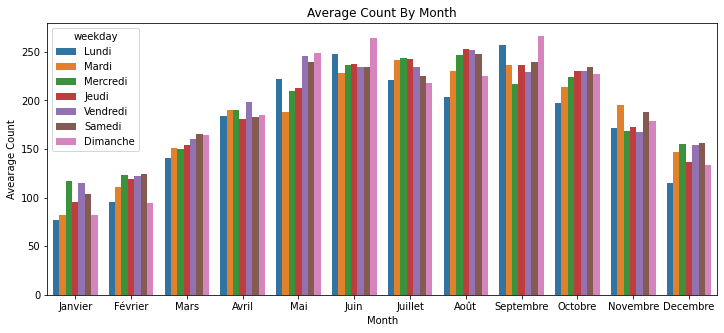

In [32]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
sns.barplot(data = dayAggregated,x="mnth",y="cnt",ax=ax,hue = dayAggregated["weekday"])
ax.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

In [33]:
hourAggregated = pd.DataFrame(df.groupby(["hr","season"],sort=True)["cnt"].mean()).reset_index()

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

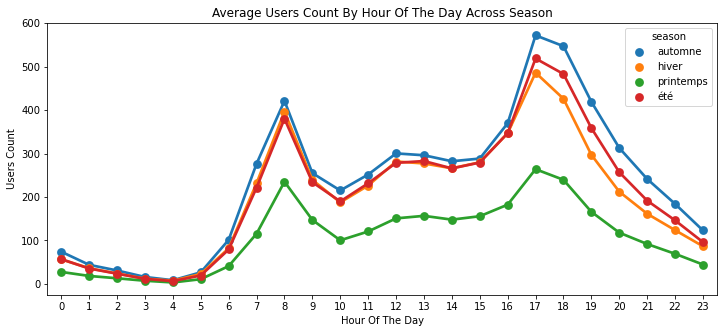

In [34]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

In [35]:
hourAggregated = pd.DataFrame(df.groupby(["hr","weekday"],sort=True)["cnt"].mean()).reset_index()

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weekdays'),
 None]

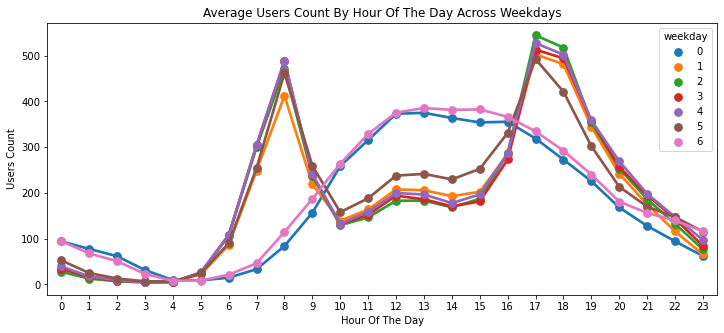

In [36]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["weekday"], data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

In [37]:
hourTransformed = pd.melt(df[["hr","casual","registered"]], id_vars=['hr'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hr","variable"],sort=True)["value"].mean()).reset_index()
hourAggregated.head()

,hr,variable,value
0,0,casual,10.158402
1,0,registered,43.739669
2,1,casual,6.504144
3,1,registered,26.871547
4,2,casual,4.772028


[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

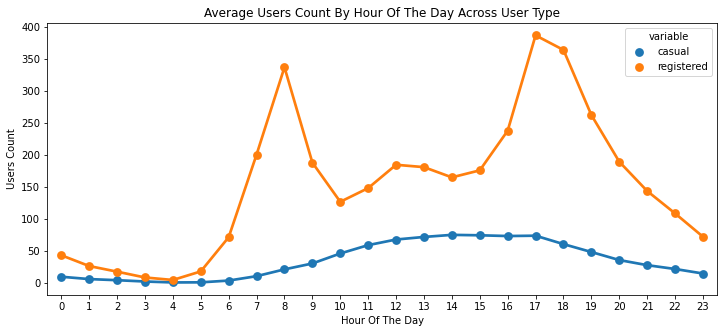

In [38]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)

sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

"Cnt" semble se comporter différement selon la saison, le week day et le mois. Il est donc nécessaire de garder ces variables, il semble qu'elles peuvent nous permettre d'expliquer notre variable à prédire.

In [39]:
# supprimé les variable inutiles ou qui se déduisent de la variable cible.
dropFeatures = ["casual","instant","dteday","registered"]
df = df.drop(dropFeatures, axis=1)

In [40]:
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,printemps,2011,1,0,non férié,6,férié ou week-end,"Clair, Peu de nuages, Partiellement nuageux, P...",0.24,0.2879,0.81,0.0000,16
1,printemps,2011,1,1,non férié,6,férié ou week-end,"Clair, Peu de nuages, Partiellement nuageux, P...",0.22,0.2727,0.80,0.0000,40
2,printemps,2011,1,2,non férié,6,férié ou week-end,"Clair, Peu de nuages, Partiellement nuageux, P...",0.22,0.2727,0.80,0.0000,32
3,printemps,2011,1,3,non férié,6,férié ou week-end,"Clair, Peu de nuages, Partiellement nuageux, P...",0.24,0.2879,0.75,0.0000,13
4,printemps,2011,1,4,non férié,6,férié ou week-end,"Clair, Peu de nuages, Partiellement nuageux, P...",0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,printemps,2012,12,19,non férié,1,jour ouvré,"Brume + nuageux, Brume + nuages fragmentés, Br...",0.26,0.2576,0.60,0.1642,119
17375,printemps,2012,12,20,non férié,1,jour ouvré,"Brume + nuageux, Brume + nuages fragmentés, Br...",0.26,0.2576,0.60,0.1642,89
17376,printemps,2012,12,21,non férié,1,jour ouvré,"Clair, Peu de nuages, Partiellement nuageux, P...",0.26,0.2576,0.60,0.1642,90
17377,printemps,2012,12,22,non férié,1,jour ouvré,"Clair, Peu de nuages, Partiellement nuageux, P...",0.26,0.2727,0.56,0.1343,61


In [41]:
df = pd.get_dummies(df,columns=["holiday"])
df = pd.get_dummies(df,columns=["weekday"])
df = pd.get_dummies(df,columns=["mnth"])
df = pd.get_dummies(df,columns=["season"])
df = pd.get_dummies(df,columns = ["workingday"])
df = pd.get_dummies(df,columns=["weathersit"])
df.columns

Index(['yr', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'holiday_férié',
       'holiday_non férié', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'mnth_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'season_automne', 'season_hiver',
       'season_printemps', 'season_été', 'workingday_férié ou week-end',
       'workingday_jour ouvré',
       'weathersit_Brume + nuageux, Brume + nuages fragmentés, Brume + peu de nuages, Brume',
       'weathersit_Clair, Peu de nuages, Partiellement nuageux, Partiellement nuageux',
       'weathersit_Forte pluie + palettes de glace + orage + brume, neige + brouillard',
       'weathersit_Neige légère, Pluie légère + Orage + Nuages épars, Pluie légère + Nuages épars'],
      dtype='object')

In [42]:
df.head()

,yr,hr,temp,atemp,hum,windspeed,cnt,holiday_férié,holiday_non férié,weekday_0,...,season_automne,season_hiver,season_printemps,season_été,workingday_férié ou week-end,workingday_jour ouvré,"weathersit_Brume + nuageux, Brume + nuages fragmentés, Brume + peu de nuages, Brume","weathersit_Clair, Peu de nuages, Partiellement nuageux, Partiellement nuageux","weathersit_Forte pluie + palettes de glace + orage + brume, neige + brouillard","weathersit_Neige légère, Pluie légère + Orage + Nuages épars, Pluie légère + Nuages épars"
0,2011,0,0.24,0.2879,0.81,0.0,16,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,2011,1,0.22,0.2727,0.80,0.0,40,0,1,0,...,0,0,1,0,1,0,0,1,0,0
2,2011,2,0.22,0.2727,0.80,0.0,32,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,2011,3,0.24,0.2879,0.75,0.0,13,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,2011,4,0.24,0.2879,0.75,0.0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0


## Model Selection

In [43]:
X = df.drop('cnt',axis = 1)
y = df['cnt']

In [44]:
#split data into training and test data (80% versus 20%)
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=4) 

R2 square:  0.42278286592268466
MAE:  103.21505803087263
MSE:  18873.23214472012


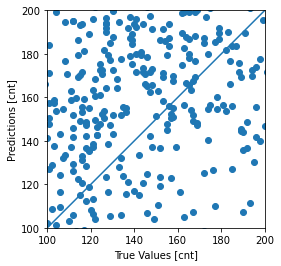

In [60]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#prediction 
y_pred = lin_reg.predict(X_test)
MLR_MAE = metrics.mean_absolute_error(y_test, y_pred)
MLR_MSE = metrics.mean_squared_error(y_test, y_pred)
MLR_R2 = metrics.r2_score(y_test, y_pred)

print("R2 square: ",MLR_R2)
print("MAE: ",MLR_MAE)
print("MSE: ",MLR_MSE)

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [cnt]')
plt.ylabel('Predictions [cnt]')
lims = [100, 200]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

R2 square: 0.8942509735848845
MAE:  34.20353855005754
MSE:  3457.669231875719


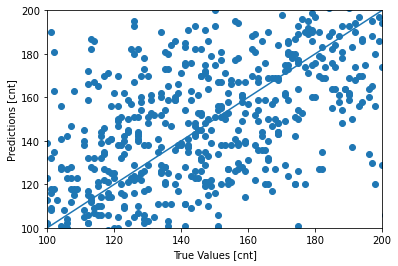

In [72]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred = dt_regressor.predict(X_test)
DTR_mae= metrics.mean_absolute_error(y_test, y_pred)
DTR_mse= metrics.mean_squared_error(y_test, y_pred)
DTR_R2 = metrics.r2_score(y_test, y_pred)

# Printing the metrics
print('R2 square:',DTR_R2)
print('MAE: ', DTR_mae)
print('MSE: ', DTR_mse)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [cnt]')
plt.ylabel('Predictions [cnt]')
lims = [100, 200]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

R2 square: 0.9426609374720334
MAE:  25.592806146912157
MSE:  1874.8117028452323


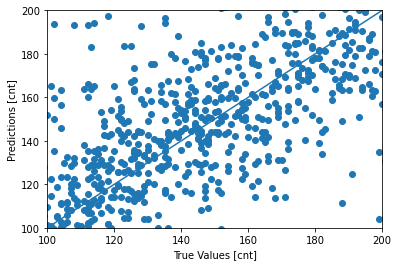

In [66]:
rf_regressor = RandomForestRegressor(random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred = rf_regressor.predict(X_test)
RFR_mae=metrics.mean_absolute_error(y_test, y_pred)
RFR_mse=metrics.mean_squared_error(y_test, y_pred)
RFR_R2 = metrics.r2_score(y_test, y_pred)

# Printing the metrics
print('R2 square:',RFR_R2)
print('MAE: ', RFR_mae)
print('MSE: ', RFR_mse)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [cnt]')
plt.ylabel('Predictions [cnt]')
lims = [100, 200]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

R2 square: -0.05606209556945996
MAE:  136.77691338092754
MSE:  34529.995580921764


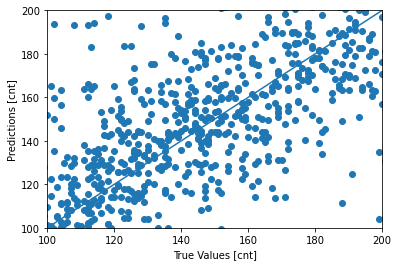

In [70]:
regressor= SVR(kernel='rbf')
regressor.fit(X_train,y_train)
y_pred_svm=regressor.predict(X_test)

#y_pred_svm = cross_val_predict(regressor, x, y)
SVR_mae=metrics.mean_absolute_error(y_test, y_pred_svm)
SVR_mse=metrics.mean_squared_error(y_test, y_pred_svm)
SVR_R2=metrics.r2_score(y_test, y_pred_svm)

# Printing the metrics
print('R2 square:',SVR_R2)
print('MAE: ', SVR_mae)
print('MSE: ', SVR_mse)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [cnt]')
plt.ylabel('Predictions [cnt]')
lims = [100, 200]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Nous pouvons donc ici comparer les performances de tous les modèles à l'aide des métriques calculées. Nous allons voir tous les modèles utilisés pour prédire le nombre total de locations de vélo par heure ensemble avec leurs métriques pour faciliter la comparaison.

In [73]:
data = {'Model type': ['MLR', 'Decision Tree', 'Random Forest', 'SVM'], 'MAE': [MLR_MAE,DTR_mae,RFR_mae,SVR_mae], 'RSquare': [MLR_R2,DTR_R2,RFR_R2,SVR_R2]}
dt = pd.DataFrame(data)
dt

,Model type,MAE,RSquare
0,MLR,103.215058,0.422783
1,Decision Tree,34.203539,0.894251
2,Random Forest,25.592806,0.942661
3,SVM,136.776913,-0.056062


D'après le tableau ci-dessus, il est clair que pour le problème actuel, le modèle le plus performant est Random Forest avec le R carré (coefficient de détermination) le plus élevé et le MAE le plus faible.

# Optimisation

In [77]:
Features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

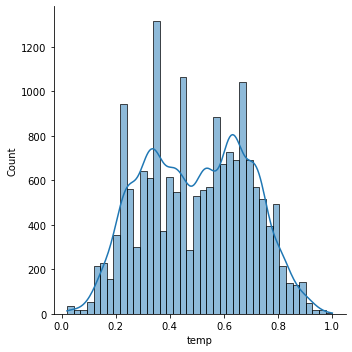

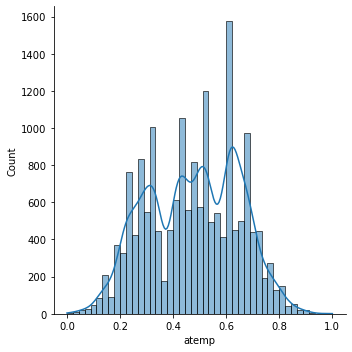

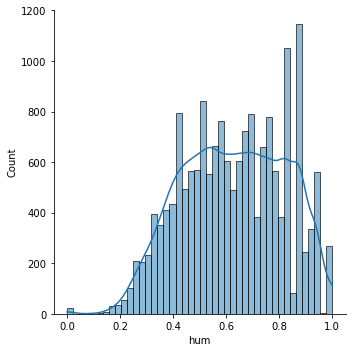

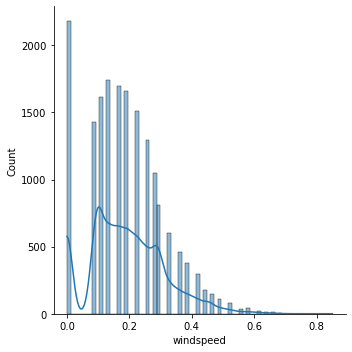

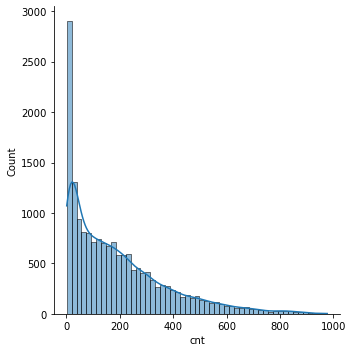

In [79]:
for x in Features:
    sns.displot(data = df, x = x, kde = True)
    plt.show

In [136]:
dfo = df.drop('atemp',axis = 1) # Cov(temp,atemp) = .99%


In [137]:
dfo

,yr,hr,temp,hum,windspeed,cnt,holiday_férié,holiday_non férié,weekday_0,weekday_1,...,season_automne,season_hiver,season_printemps,season_été,workingday_férié ou week-end,workingday_jour ouvré,"weathersit_Brume + nuageux, Brume + nuages fragmentés, Brume + peu de nuages, Brume","weathersit_Clair, Peu de nuages, Partiellement nuageux, Partiellement nuageux","weathersit_Forte pluie + palettes de glace + orage + brume, neige + brouillard","weathersit_Neige légère, Pluie légère + Orage + Nuages épars, Pluie légère + Nuages épars"
0,2011,0,0.24,0.81,0.0000,16,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1,2011,1,0.22,0.80,0.0000,40,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
2,2011,2,0.22,0.80,0.0000,32,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
3,2011,3,0.24,0.75,0.0000,13,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
4,2011,4,0.24,0.75,0.0000,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012,19,0.26,0.60,0.1642,119,0,1,0,1,...,0,0,1,0,0,1,1,0,0,0
17375,2012,20,0.26,0.60,0.1642,89,0,1,0,1,...,0,0,1,0,0,1,1,0,0,0
17376,2012,21,0.26,0.60,0.1642,90,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
17377,2012,22,0.26,0.56,0.1343,61,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0


In [138]:
X = dfo.drop('cnt',axis = 1)
y = dfo['cnt']

In [139]:
#split data into training and test data (80% versus 20%)
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=4) 
#further split traning data into training and validation data (90% versus 10%)
X_train_new, X_val, y_train_new, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.1, random_state=4)
#set range of max_depth
max_depth_range = range(1, 25) 

In [140]:
#creat two lists which record results
val_R2_res = []
val_mae_res = []
train_R2_res = []
train_mae_res = []

In [141]:
#calculate the accuracy of random forest model with max_depth in [1,15] 
for k in max_depth_range:
    clf_2 = RandomForestRegressor(criterion='squared_error', max_depth= k)
    clf_2 = clf_2.fit(X_train_new, y_train_new)
    #accuracy on training
    pred_train_new = clf_2.predict(X_train_new)
    #train_score = metrics.accuracy_score(y_train_new, pred_train_new) 
    train_mae = metrics.mean_absolute_error(y_train_new, pred_train_new)
    train_R2 = metrics.r2_score(y_train_new, pred_train_new)
    train_R2_res.append(train_R2)
    train_mae_res.append(train_mae)
    #accuracy on validation data
    pred_val = clf_2.predict(X_val) 
    #val_score = metrics.accuracy_score(y_val, pred_val) 
    val_mae = metrics.mean_absolute_error(y_val, pred_val)
    val_R2 = metrics.r2_score(y_val, pred_val)
    #val_results.append(val_score)    
    val_R2_res.append(val_R2)
    val_mae_res.append(val_mae)

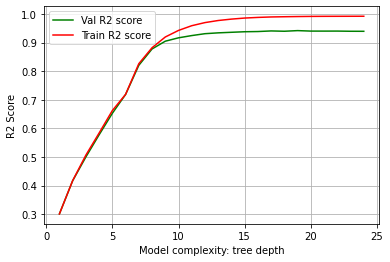

In [142]:
#plot the R squared score curves on both validation and test datasets
plt.plot(max_depth_range, val_R2_res, 'g-', label='Val R2 score')
plt.plot(max_depth_range, train_R2_res, 'r-', label='Train R2 score')
plt.ylabel('R2 Score')
plt.xlabel('Model complexity: tree depth')
plt.legend()
plt.grid(True)
plt.show()

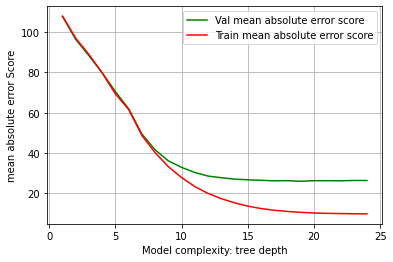

In [143]:
#plot the mean absolute error score curves on both validation and test datasets
plt.plot(max_depth_range, val_mae_res, 'g-', label='Val mean absolute error score')
plt.plot(max_depth_range, train_mae_res, 'r-', label='Train mean absolute error score')
plt.ylabel('mean absolute error Score')
plt.xlabel('Model complexity: tree depth')
plt.legend()
plt.grid(True)
plt.show()

In [156]:
clf_best1 = RandomForestRegressor(criterion='squared_error', max_depth= 17)
clf_best1 = clf_best1.fit(X_train, y_train)
y_pred = clf_best1.predict(X_test)
print("R2 score : ", metrics.r2_score(y_test, y_pred))
print("mean absolute error Score : ", metrics.mean_absolute_error(y_test, y_pred))

R2 score :  0.9438521383304155
mean absolute error Score :  25.526079690396173


## Pespectives

Pour avoir un modèle plus robuste il faudrait réaliser plusieurs cross validation pour obtenir plusieurs modèles puis terminer par un vote ou une moyenne des différents modèles obtenus. d'où l'utilité d'utiliser;

    k-fold cross-validation qui represente une façon d'améliorer la méthode holdout utilisée auparavant.

    XGBoost,Light GBM pour avoir des modèles plus robust.